In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display


from sklearn.metrics import classification_report, roc_auc_score,precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit,ShuffleSplit,StratifiedKFold,GroupKFold
from sklearn.metrics import precision_score

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 
path_train = 'train.csv'
df_train = pd.read_csv(path_train)# содержит только имя файла, без имен папок !!!

In [3]:
df_train['quality'] = np.where(df_train['quality']>=7,1,0)#заменим классы
df_train.info()

df_train.drop_duplicates()
display(df_train.describe())
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 155.1 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,0.358261
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,0.479628
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,0.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,0.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,1.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,1.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6,0
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8,0
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,1
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1


In [4]:
X = df_train.drop(['quality'],axis=1)# определим фичи
y = df_train.quality #определим таргет
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)# соразмерны
print(y_test.shape)

(1380, 11)
(1380,)
(345, 11)
(345,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.019249,0.308119,0.110090,0.046589,-0.071502,0.090890,0.298510,-0.428505,-0.027443,-0.136929
volatile acidity,-0.019249,1.000000,-0.193696,0.097584,0.098649,-0.117890,0.100351,0.044907,-0.054374,-0.070820,0.036713
citric acid,0.308119,-0.193696,1.000000,0.088621,0.118834,0.110299,0.123885,0.139801,-0.151155,0.045080,-0.050179
residual sugar,0.110090,0.097584,0.088621,1.000000,0.096714,0.321649,0.438185,0.798569,-0.166196,-0.030785,-0.404295
chlorides,0.046589,0.098649,0.118834,0.096714,1.000000,0.101924,0.222393,0.306691,-0.090465,0.042989,-0.404737
free sulfur dioxide,-0.071502,-0.117890,0.110299,0.321649,0.101924,1.000000,0.605713,0.304056,0.012516,0.084226,-0.237443
total sulfur dioxide,0.090890,0.100351,0.123885,0.438185,0.222393,0.605713,1.000000,0.562273,0.014276,0.152732,-0.439156
density,0.298510,0.044907,0.139801,0.798569,0.306691,0.304056,0.562273,1.000000,-0.056469,0.080527,-0.802832
pH,-0.428505,-0.054374,-0.151155,-0.166196,-0.090465,0.012516,0.014276,-0.056469,1.000000,0.168643,0.075596
sulphates,-0.027443,-0.070820,0.045080,-0.030785,0.042989,0.084226,0.152732,0.080527,0.168643,1.000000,-0.026955


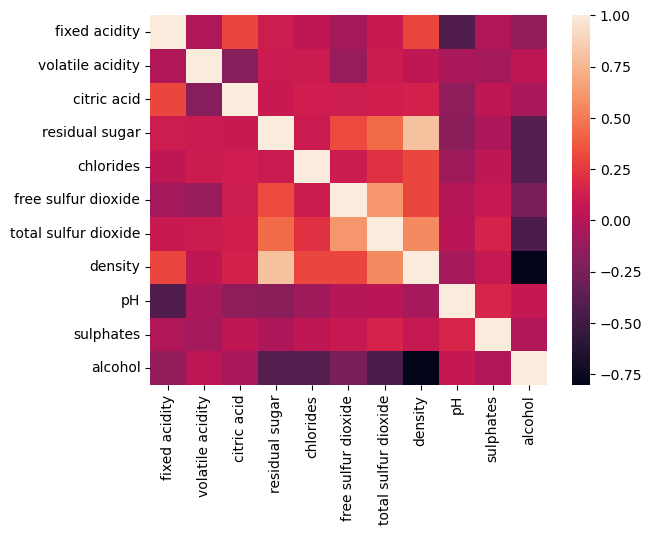

In [5]:
corr_matrix=X.corr()
display(corr_matrix)
sns.heatmap(corr_matrix);
#заметим! коррелируют density и alcohol(плотность и алкоголь)

In [6]:
# Выберем метрику.
# Для нашей задачи подходит метрика точности(precision)
# Почему? Precison измерит долю TP к sum(TP,FP) и уменьшит ложные срабатывания. Цель: уверенность в том, 
# что точно отобрали вина лучшего качества 

In [7]:
# Сначала проверим самый "наивный" алгоритм. От него отталкиваемся. пока не удаляем зависимые фичи

In [8]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 10)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True,scoring="precision")

grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [9]:

print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.562995724632201
Правильность для наилучшей модели на тестовом наборе: 0.6089743589743589


In [10]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.004276,0.006898,0.009807,0.004825
std_fit_time,0.002528,0.005811,0.002301,0.003177
mean_score_time,0.004743,0.004686,0.002014,0.002415
std_score_time,0.003843,0.004872,0.002214,0.002638
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.578199,0.578199,0.578199,0.472656
split1_test_score,0.555556,0.555556,0.555556,0.48249
split2_test_score,0.54717,0.54717,0.54717,0.504098


In [11]:
# Посмотрим соседей . продемонстрирую проверку только одного варианта так как долго грузит много соседей

In [12]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier',    KNeighborsClassifier())])


kfold = KFold(n_splits=10, shuffle=True)



p = [1,2,3]
weights = ['uniform','distance']
n_neighbors = [30]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer() ]


param_grid =[
    {'preprocessing': scaling, 
     'classifier': [KNeighborsClassifier()],
         'classifier__n_neighbors': n_neighbors,
         'classifier__p': p,
         'classifier__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'precision')
grid.fit(X_train,y_train) 
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=30,
                                                              p=3)],
                          'classifier__n_neighbors': [30],
                          'classifier__p': [1, 2, 3],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='precision')

In [13]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'classifier': KNeighborsClassifier(n_neighbors=30, p=3), 'classifier__n_neighbors': 30, 'classifier__p': 3, 'classifier__weights': 'uniform', 'preprocessing': StandardScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.6538714512084077
Правильность для наилучшей модели на тестовом наборе: 0.7821782178217822


In [14]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,17,0,4,21,9,13,5,6,1,22,...,18,8,14,10,19,23,15,11,3,7
mean_fit_time,0.004724,0.004605,0.006422,0.006446,0.005748,0.005247,0.005378,0.010518,0.005533,0.009053,...,0.008736,0.008032,0.007596,0.00872,0.005824,0.0082,0.005942,0.005746,0.005729,0.005459
std_fit_time,0.003607,0.003183,0.003243,0.002429,0.003191,0.003425,0.002196,0.003377,0.002761,0.002814,...,0.003154,0.003231,0.002918,0.003447,0.002057,0.00203,0.002653,0.002641,0.003577,0.002906
mean_score_time,0.063374,0.01436,0.007123,0.05798,0.011236,0.007645,0.007903,0.007629,0.011665,0.048878,...,0.051708,0.011587,0.007765,0.013569,0.020747,0.016748,0.004985,0.010703,0.010021,0.005334
std_score_time,0.011154,0.002959,0.003267,0.004111,0.001659,0.002444,0.003923,0.003405,0.002439,0.00411,...,0.001782,0.002144,0.003736,0.00366,0.001062,0.004252,0.001943,0.001479,0.002527,0.003298
param_classifier,"KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)",...,"KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)"
param_classifier__n_neighbors,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
param_classifier__p,3,1,1,3,2,2,1,1,1,3,...,3,2,2,2,3,3,2,2,1,1
param_classifier__weights,uniform,uniform,distance,distance,uniform,distance,distance,distance,uniform,distance,...,uniform,uniform,distance,uniform,uniform,distance,distance,uniform,uniform,distance
param_preprocessing,StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),...,RobustScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [15]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier',    KNeighborsClassifier())])


kfold = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 10)



p = [1,2,3]
weights = ['uniform','distance']
n_neighbors = [30]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer() ]


param_grid =[
    {'preprocessing': scaling, 
     'classifier': [KNeighborsClassifier()],
         'classifier__n_neighbors': n_neighbors,
         'classifier__p': p,
         'classifier__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'precision')
grid.fit(X_train,y_train) 
grid

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=30,
                                                              p=3)],
                          'classifier__n_neighbors': [30],
                          'classifier__p': [1, 2, 3],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='precision')

In [16]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'classifier': KNeighborsClassifier(n_neighbors=30, p=3), 'classifier__n_neighbors': 30, 'classifier__p': 3, 'classifier__weights': 'uniform', 'preprocessing': StandardScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.6360427784200555
Правильность для наилучшей модели на тестовом наборе: 0.7821782178217822


In [17]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,17,21,13,9,0,16,14,10,4,6,...,22,1,5,12,3,7,19,11,15,23
mean_fit_time,0.005573,0.005471,0.005735,0.005827,0.00345,0.002715,0.007994,0.009589,0.005205,0.009263,...,0.008639,0.00372,0.004188,0.00592,0.005513,0.005929,0.004612,0.00387,0.004504,0.005033
std_fit_time,0.003623,0.003167,0.002342,0.003214,0.002495,0.002815,0.00188,0.002267,0.003093,0.001244,...,0.001733,0.003905,0.003761,0.001177,0.002806,0.002517,0.003404,0.002536,0.002747,0.003416
mean_score_time,0.132974,0.11402,0.015718,0.028845,0.030262,0.121407,0.012984,0.031186,0.012779,0.013086,...,0.101115,0.031691,0.01479,0.013615,0.024926,0.008348,0.060916,0.026403,0.008148,0.040367
std_score_time,0.00528,0.004023,0.005006,0.002093,0.004763,0.007117,0.002576,0.003987,0.00245,0.002378,...,0.002288,0.00452,0.003567,0.001781,0.003128,0.002332,0.012454,0.00203,0.002547,0.002165
param_classifier,"KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)",...,"KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)","KNeighborsClassifier(n_neighbors=30, p=3)"
param_classifier__n_neighbors,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
param_classifier__p,3,3,2,2,1,3,2,2,1,1,...,3,1,1,2,1,1,3,2,2,3
param_classifier__weights,uniform,distance,distance,uniform,uniform,uniform,distance,uniform,distance,distance,...,distance,uniform,distance,distance,uniform,distance,uniform,uniform,distance,distance
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),...,RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [18]:
pipe = Pipeline([('preprocessing', RobustScaler()),
('clf', LogisticRegression())])


cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[

{'preprocessing': scaling,
'clf__penalty': ['l1','l2','none','elasticnet'],
'clf__solver': ['liblinear','newton-cg' ,'lbfgs','sag', 'saga',"newton-cholesky"]},

]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached whi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the 

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l1', 'l2', 'none', 'elasticnet'],
                          'clf__solver': ['liblinear', 'newton-cg', 'lbfgs',
                                          'sag', 'saga', 'newton-cholesky'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [19]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))


Наилучшие параметры: {'clf__penalty': 'none', 'clf__solver': 'newton-cg', 'preprocessing': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.7550724637681159
Правильность для наилучшей модели на тестовом наборе: 0.7507246376811594


In [20]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,52,53,54,56,57,58,60,61,64,68,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.017513,0.018045,0.018876,0.016819,0.009769,0.014874,0.01779,0.022703,0.021729,0.009863,...,0.009661,0.005133,0.00634,0.004643,0.004577,0.004277,0.005924,0.006362,0.008063,0.005237
std_fit_time,0.001653,0.002765,0.002456,0.004459,0.001783,0.003918,0.005783,0.004663,0.002705,0.00254,...,0.00081,0.000973,0.003204,0.00351,0.002961,0.004153,0.003563,0.002167,0.002035,0.004151
mean_score_time,0.002426,0.000807,0.002812,0.003391,0.003231,0.002302,0.002693,0.001403,0.001485,0.003117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.002081,0.001614,0.001333,0.00284,0.002731,0.002754,0.003582,0.001202,0.001254,0.001105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,none,none,none,none,none,none,none,none,none,none,...,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet
param_clf__solver,newton-cg,newton-cg,newton-cg,lbfgs,lbfgs,lbfgs,sag,sag,saga,newton-cholesky,...,sag,sag,saga,saga,saga,saga,newton-cholesky,newton-cholesky,newton-cholesky,newton-cholesky
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'sag',...","{'clf__penalty': 'none', 'clf__solver': 'sag',...","{'clf__penalty': 'none', 'clf__solver': 'saga'...","{'clf__penalty': 'none', 'clf__solver': 'newto...",...,"{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ..."
split0_test_score,0.770531,0.770531,0.770531,0.770531,0.770531,0.770531,0.770531,0.770531,0.770531,0.770531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.743961,0.743961,0.743961,0.743961,0.743961,0.743961,0.743961,0.743961,0.743961,0.743961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#density попробуем удалить

In [22]:
X = df_train.drop(['quality','density'],axis=1)
y = df_train.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1380, 10)
(1380,)
(345, 10)
(345,)


In [23]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('clf',           GaussianNB())])

cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 10)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True,scoring="precision")

grid.fit(X_train, y_train)
grid 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='precision')

In [24]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
display(grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'clf': GaussianNB(), 'preprocessing': MinMaxScaler()}

Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.575090

Правильность для наилучшей модели на тестовом наборе: 0.572222



In [25]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.004574,0.004011,0.005749,0.005244
std_fit_time,0.002869,0.002545,0.003371,0.00328
mean_score_time,0.00463,0.002442,0.003497,0.003233
std_score_time,0.003012,0.003311,0.003787,0.002296
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.555556,0.555556,0.555556,0.479508
split1_test_score,0.556122,0.556122,0.556122,0.440329
split2_test_score,0.593909,0.593909,0.593909,0.560185


In [26]:
#наивному Байесу стало лучше

In [27]:
pipe = Pipeline([('preprocessing', RobustScaler()),
('clf', LogisticRegression())])


cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[

{'preprocessing': scaling,
'clf__penalty': ['l1','l2','none','elasticnet'],
'clf__solver': ['liblinear','newton-cg' ,"newton-cholesky",'lbfgs','sag', 'saga']},

]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l1', 'l2', 'none', 'elasticnet'],
                          'clf__solver': ['liblinear', 'newton-cg',
                                          'newton-cholesky', 'lbfgs', 'sag',
                                          'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [28]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'clf__penalty': 'none', 'clf__solver': 'newton-cg', 'preprocessing': Normalizer()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.7550724637681159
Правильность для наилучшей модели на тестовом наборе: 0.7420289855072464


In [29]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,55,59,44,28,32,36,40,24,2,0,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.06224,0.008939,0.00743,0.010258,0.00792,0.010359,0.006695,0.005288,0.007285,0.011811,...,0.005672,0.001519,0.00543,0.004007,0.005237,0.002921,0.004133,0.005651,0.006956,0.004377
std_fit_time,0.001836,0.001247,0.002887,0.000758,0.00408,0.000609,0.001461,0.004585,0.004343,0.004752,...,0.003468,0.001361,0.003882,0.003965,0.001677,0.001115,0.00361,0.004668,0.004237,0.003266
mean_score_time,0.003006,0.002918,0.003215,0.002409,0.002224,0.00381,0.002915,0.006341,0.003269,0.0016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.002917,0.000907,0.00273,0.001367,0.003516,0.003402,0.002119,0.00461,0.004371,0.001357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,none,none,l2,l2,l2,l2,l2,l2,l1,l1,...,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet
param_clf__solver,newton-cg,newton-cholesky,saga,newton-cg,newton-cholesky,lbfgs,sag,liblinear,liblinear,liblinear,...,lbfgs,lbfgs,sag,sag,sag,sag,saga,saga,saga,saga
param_preprocessing,Normalizer(),Normalizer(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l1', 'clf__solver': 'libline...",...,"{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ..."
split0_test_score,0.768116,0.768116,0.76087,0.76087,0.76087,0.76087,0.76087,0.763285,0.756039,0.7657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.775362,0.775362,0.7657,0.7657,0.7657,0.7657,0.7657,0.76087,0.763285,0.756039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# регрессии тоже стало лучше

In [31]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier',    KNeighborsClassifier())])


kfold = KFold(n_splits=10, shuffle=True)



p = np.arange(1,10)
weights = ['uniform','distance']
n_neighbors = [30]
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer() ]


param_grid =[
    {'preprocessing': scaling, 
     'classifier': [KNeighborsClassifier()],
         'classifier__n_neighbors': n_neighbors,
         'classifier__p': p,
         'classifier__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'precision')
grid.fit(X_train,y_train) 
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=30,
                                                              p=5)],
                          'classifier__n_neighbors': [30],
                          'classifier__p': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='precision')

In [32]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'classifier': KNeighborsClassifier(n_neighbors=30, p=5), 'classifier__n_neighbors': 30, 'classifier__p': 5, 'classifier__weights': 'uniform', 'preprocessing': StandardScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.6927747452532905
Правильность для наилучшей модели на тестовом наборе: 0.6666666666666666


In [33]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,33,61,69,65,45,29,53,57,41,64,...,51,23,7,15,31,71,39,63,47,55
mean_fit_time,0.004558,0.006746,0.006386,0.005727,0.006144,0.007064,0.00652,0.005185,0.003747,0.006466,...,0.006136,0.006634,0.005834,0.006573,0.003647,0.004172,0.007423,0.004783,0.006649,0.006066
std_fit_time,0.003515,0.003792,0.003579,0.002989,0.003586,0.002075,0.002521,0.002312,0.002555,0.002875,...,0.003272,0.002966,0.002886,0.003513,0.003096,0.002463,0.002881,0.002522,0.003134,0.003252
mean_score_time,0.050594,0.044264,0.04398,0.050612,0.050713,0.046146,0.043941,0.047541,0.053825,0.04328,...,0.018802,0.014394,0.005463,0.004504,0.016562,0.016368,0.015528,0.016113,0.015148,0.015724
std_score_time,0.002083,0.003186,0.003175,0.002295,0.006296,0.004137,0.002477,0.002912,0.00473,0.003967,...,0.001908,0.002966,0.004126,0.003615,0.003279,0.002352,0.004277,0.002477,0.003315,0.002461
param_classifier,"KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)",...,"KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)","KNeighborsClassifier(n_neighbors=30, p=5)"
param_classifier__n_neighbors,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
param_classifier__p,5,8,9,9,6,4,7,8,6,9,...,7,3,1,2,4,9,5,8,6,7
param_classifier__weights,uniform,distance,distance,uniform,distance,distance,distance,uniform,uniform,uniform,...,uniform,distance,distance,distance,distance,distance,distance,distance,distance,distance
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [34]:
#соседи лучше не показали

# алкоголь убирать не будем так как с большой вероятностью он влияет на качество вина

In [35]:
#Вернемся к зависимости признаков
#fixed acidity и citric acid скорее всего несут похожую информацию
#pH - мера кислотностиm, fixed acidity - общая концентрация щелочных соединений похоже, что тоже
#free sulfur dioxide и total sulfur dioxide похоже, что связаны,но с их удалением модель ухудшается
#лушчая комбинация фич(денсити не убираем)

In [9]:
X = df_train.drop(['pH','citric acid','quality','density'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1380, 8)
(1380,)
(345, 8)
(345,)


In [10]:
pipe = Pipeline([('preprocessing', RobustScaler()),
('clf', LogisticRegression())])



cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[

{'preprocessing': scaling,
'clf__penalty': ['l1','l2','none','elasticnet'],
'clf__solver': ['liblinear','newton-cg' ,"newton-cholesky",'lbfgs','sag', 'saga']},

]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logi

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', RobustScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf__penalty': ['l1', 'l2', 'none', 'elasticnet'],
                          'clf__solver': ['liblinear', 'newton-cg',
                                          'newton-cholesky', 'lbfgs', 'sag',
                                          'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [12]:
print("Наилучшие параметры:" ,grid.best_params_)
print("Средняя правильность для наилучшей модели кроссвалидации на" 
      "валидационных тестовых наборах:" ,grid.best_score_)
print("Правильность для наилучшей модели на тестовом наборе:",grid.score(X_test, y_test))

Наилучшие параметры: {'clf__penalty': 'l2', 'clf__solver': 'newton-cg', 'preprocessing': MinMaxScaler()}
Средняя правильность для наилучшей модели кроссвалидации навалидационных тестовых наборах: 0.7502415458937198
Правильность для наилучшей модели на тестовом наборе: 0.744927536231884


In [13]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,28,32,36,40,44,52,53,54,56,57,...,86,87,88,89,90,91,92,93,94,95
mean_fit_time,0.0206,0.0118,0.013384,0.008273,0.010682,0.022422,0.018486,0.023968,0.015209,0.01466,...,0.012786,0.005586,0.007774,0.00947,0.006472,0.009583,0.007648,0.00767,0.011813,0.007171
std_fit_time,0.004767,0.003988,0.002442,0.003118,0.000193,0.002098,0.005542,0.004603,0.004075,0.003796,...,0.004665,0.003456,0.006833,0.004059,0.005269,0.005172,0.00238,0.003951,0.005175,0.003885
mean_score_time,0.005558,0.003063,0.00575,0.00724,0.004825,0.003419,0.004299,0.002865,0.003175,0.005345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.003609,0.002534,0.003463,0.002242,0.000928,0.004041,0.003747,0.001526,0.003129,0.000905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_clf__penalty,l2,l2,l2,l2,l2,none,none,none,none,none,...,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet
param_clf__solver,newton-cg,newton-cholesky,lbfgs,sag,saga,newton-cg,newton-cg,newton-cg,newton-cholesky,newton-cholesky,...,lbfgs,lbfgs,sag,sag,sag,sag,saga,saga,saga,saga
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),...,RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...",...,"{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ...","{'clf__penalty': 'elasticnet', 'clf__solver': ..."
split0_test_score,0.758454,0.758454,0.758454,0.758454,0.758454,0.758454,0.758454,0.758454,0.758454,0.758454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.758454,0.758454,0.758454,0.758454,0.758454,0.748792,0.748792,0.748792,0.748792,0.748792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
